In [79]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [80]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# set up plotly defaults
pio.renderers.default = "plotly_mimetype+svg"
pio.templates["book"] = go.layout.Template(
    layout=dict(
        margin=dict(l=10, r=10, t=10, b=10),
        autosize=True,
        width=350,
        height=250,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        title=dict(x=0.5, xanchor="center"),
    )
)
pio.templates.default = "simple_white+book"

def margin(fig, **kwargs):
    """Set margins for a plotly figure"""
    return fig.update_layout(margin=kwargs)

# Exercises

#### Exercise 1

- Use the `baby` data to create a plot of how popular your name was over time.
  If you used that plot to make a guess at your age, what would you guess? Is
  that close to your actual age? Think of a potential reason.

#### My solution: 

In [81]:
baby = pd.read_csv("data/babynames.csv")
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


In [82]:
names_over_time = (baby
                     .groupby(["Name","Year"])
                     ['Count']
                     .sum()
                     .reset_index()
                  )
names_over_time

,Name,Year,Count
0,Aaban,2007,5
1,Aaban,2009,6
2,Aaban,2010,9
...,...,...,...
1844558,Zyyon,2014,6
1844559,Zzyzx,2010,5
1844560,Zzyzx,2018,5


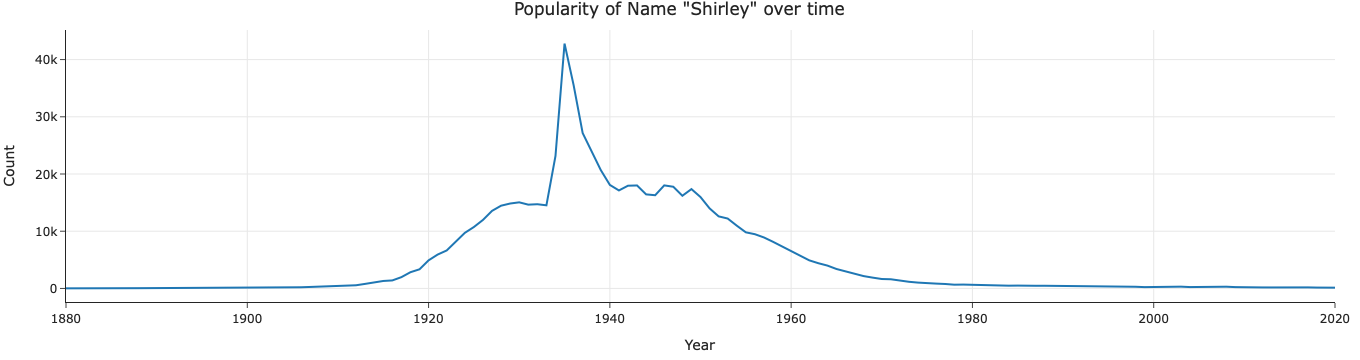

In [83]:
Shirley_over_time = px.line(names_over_time.loc[names_over_time['Name'] == 'Shirley'],
                            x='Year', y='Count', title = 'Popularity of Name "Shirley" over time',
                            width=350, height=250)
margin(Shirley_over_time,t=30)

If I used that plot to make a guess at your age, I would guess that my birth year is probably from the 1940s and my age is around 80 years old. It is not at all close to my actual age 23 as of 2022, I think a potential reason is that I picked a really pretty name that is reminiscence of the Great Depression days. 

#### Exercise 2: 
In this chapter we talked about how to use .loc and .iloc for slicing. We've also shown a few shorthands. For each of these shorthand code snippets, convert them to the equivalent code that uses .loc or .iloc.

In [84]:
#q1
baby['Name']

0            Liam
1            Noah
2          Oliver
            ...  
2020719    Verona
2020720    Vertie
2020721     Wilma
Name: Name, Length: 2020722, dtype: object

#### My solution:

In [85]:
baby.loc[:, 'Name']

0            Liam
1            Noah
2          Oliver
            ...  
2020719    Verona
2020720    Vertie
2020721     Wilma
Name: Name, Length: 2020722, dtype: object

In [182]:
#q2
baby[0:5]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
3,Elijah,M,13034,2020
4,William,M,12541,2020


#### My solution:

In [87]:
baby.loc[0:5, 'Name':'Year']

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
3,Elijah,M,13034,2020
4,William,M,12541,2020
5,James,M,12250,2020


In [88]:
#q3
baby[['Name', 'Count']]

,Name,Count
0,Liam,19659
1,Noah,18252
2,Oliver,14147
...,...,...
2020719,Verona,5
2020720,Vertie,5
2020721,Wilma,5


#### My solution

In [89]:
baby.loc[:, ['Name', 'Count']]

,Name,Count
0,Liam,19659
1,Noah,18252
2,Oliver,14147
...,...,...
2020719,Verona,5
2020720,Vertie,5
2020721,Wilma,5


In [90]:
#q4
baby[baby['Count'] < 10]

,Name,Sex,Count,Year
7967,Aadarsh,M,9,2020
7968,Aadhi,M,9,2020
7969,Aadish,M,9,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


#### My solution

In [91]:
baby.loc[baby['Count'] < 10, :]

,Name,Sex,Count,Year
7967,Aadarsh,M,9,2020
7968,Aadhi,M,9,2020
7969,Aadish,M,9,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


- What's the difference between running:
  
  ```python
  baby['Name']
  ```
  
  and:

  ```python
  baby[['Name']]
  ```

  And, why does this code work:

  ```python
  baby[['Name']].iloc[0:5, 0]
  ```
  
  but this code errors?

  ```python
  baby['Name'].iloc[0:5, 0]
  ```

#### My solution

The difference between ```python baby['Name']``` and ```python baby [['Name']]``` is that ```python baby['Name']``` returns the information imbeded in the column of Name whereas the baby ```python [['Name']] ```
shows the actual dataset column. We can work with the dataset column but not the information imbeded in the column, therefore, ```python baby[['Name']].iloc[0:5, 0]``` works and ```python baby['Name'].iloc[0:5, 0]```errors.

In [92]:
baby[['Name']]

,Name
0,Liam
1,Noah
2,Oliver
...,...
2020719,Verona
2020720,Vertie
2020721,Wilma


In [93]:
baby['Name']

0            Liam
1            Noah
2          Oliver
            ...  
2020719    Verona
2020720    Vertie
2020721     Wilma
Name: Name, Length: 2020722, dtype: object

In [94]:
  baby[['Name']].iloc[0:5, 0]

0       Liam
1       Noah
2     Oliver
3     Elijah
4    William
Name: Name, dtype: object

#### Exercise

- The first code snippet below makes a dataframe with 6 rows, but the second
  makes a dataframe with 5 rows. Why?
  
  ```python
  baby.loc[0:5]
  ```

  ```python
  baby.iloc[0:5]
  ```

#### My solution

Slicing using .iloc works similarly to .loc, except that .iloc uses the positions of rows and columns rather than labels.

In [95]:
baby.loc[0:5]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
3,Elijah,M,13034,2020
4,William,M,12541,2020
5,James,M,12250,2020


In [96]:
baby.iloc[0:5]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
3,Elijah,M,13034,2020
4,William,M,12541,2020


- When plotting male and female baby names over time, you might notice that
  after 1950 there are generally more male babies. Is this trend reflected in
  the U.S. census data? Go to the Census website
  (https://data.census.gov/cedsci/) and check.

From the government data, it seems like there are about 97 males per 100 females in 2020.

#### Exercise

- Find the five names with the highest standard deviation of yearly counts.
  What might a large standard deviation tell you about the popularity of these
  names over time?

#### My Solution

In [114]:
names_Shirley_over_time = names_over_time.loc[names_over_time['Name'] == 'Shirley'].reset_index()

In [98]:
names_Shirley_over_time.tail()

,index,Name,Year,Count
136,1585216,Shirley,2016,168
137,1585217,Shirley,2017,184
138,1585218,Shirley,2018,152
139,1585219,Shirley,2019,147
140,1585220,Shirley,2020,135


In [99]:
recent_names_Shirley_over_time

,index,Name,Year,Count
119,1585199,Shirley,1999,231
120,1585200,Shirley,2000,259
121,1585201,Shirley,2001,305
122,1585202,Shirley,2002,259
123,1585203,Shirley,2003,313
124,1585204,Shirley,2004,240
125,1585205,Shirley,2005,284


In [105]:
#Make a function for calculating standard deviation for a set of values

def variance(data, ddof=0):
    n=len(data)
    mean=sum(data)/n
    return sum((x-mean) ** 2 for x in data)/(n-ddof)

def stdev(data):
    var = variance(data)
    std_dev=math.sqrt(var)
    return std_dev

In [106]:
#test function
stdev([100, 97, 100])

1.4142135623730951

In [ ]:
stdev

In [107]:
names_over_time

,Name,Year,Count
0,Aaban,2007,5
1,Aaban,2009,6
2,Aaban,2010,9
...,...,...,...
1844558,Zyyon,2014,6
1844559,Zzyzx,2010,5
1844560,Zzyzx,2018,5


In [115]:
names_Shirley_over_time = names_over_time.loc[names_over_time['Name'] == 'Shirley'].reset_index()

In [116]:
names_Shirley_over_time

,index,Name,Year,Count
0,1585080,Shirley,1880,18
1,1585081,Shirley,1881,7
2,1585082,Shirley,1882,20
...,...,...,...,...
138,1585218,Shirley,2018,152
139,1585219,Shirley,2019,147
140,1585220,Shirley,2020,135


In [113]:
(names_Shirley_over_time['Count'].agg(stdev))

7735.025891714631

In [135]:
stdev_names_over_years = (names_over_time
 .groupby('Name')
 ['Count']
 .agg(stdev)
 .reset_index()
)

In [136]:
stdev_names_over_years

,Name,Count
0,Aaban,3.511885
1,Aabha,1.293626
2,Aabid,0.471405
...,...,...
100361,Zyyanna,0.000000
100362,Zyyon,0.000000
100363,Zzyzx,0.000000


In [173]:
stdev_names_over_years.sort_values('Count').tail()

,Name,Count
22167,David,25402.519918
44359,John,25496.668076
39948,James,27048.467900
77413,Robert,28480.213814
65094,Michael,32115.079214


The five names with the highest standard deviation of yearly counts are Michael, Robert, James, John, and David. This means that the popularity of these names fluctuated a lot throughout the years. 

#### Exercise

- Find the five names with the highest *interquartile range* of yearly counts.
  The interquartile range is the 75th percentile minus the 25th percentile of
  the data. You may find the `pd.Series.quantile()` function useful ([link to
  documentation][quantile]). Are these names different than the names with the
  highest standard deviation? Why might this happen?

[quantile]: https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html

#### My solution

In [177]:
stdev_names_over_years.quantile()

Count    1.414214
Name: 0.5, dtype: float64

In [180]:
quantile_names_over_years = (names_over_time
 .groupby('Name')
 ['Count']
 .quantile()
 .reset_index()
)
quantile_names_over_years

,Name,Count
0,Aaban,10.0
1,Aabha,7.0
2,Aabid,5.0
...,...,...
100361,Zyyanna,6.0
100362,Zyyon,6.0
100363,Zzyzx,5.0


In [181]:
quantile_names_over_years.sort_values('Count').tail()

,Name,Count
45084,Joseph,21960.0
95980,William,24793.0
77413,Robert,31600.0
44359,John,32866.0
39948,James,34321.0


The five names with the highest interquartile range of yearly counts are James, John, Robert, William and Joseph. Out of these names, Robert, John and James are also the names with the highest standard deviation over the years.

#### Exercise 

- We've shown this syntax for grouping:

  ```python
  baby.groupby('Year')['Count'].sum()
  ```

  This code also does the same thing:

  ```python
  baby.groupby(baby['Year'])['Count'].sum()
  ```

  The second syntax passes a `pd.Series` into `.groupby()`. It's a bit more
  verbose but also gives more flexibility. Why is this syntax more flexible?

  Hint: What does this code do?

  ```python
  baby.groupby(baby['Year'] // 10 * 10)['Count'].sum()
  ```

#### My solution

In [183]:
baby.groupby(baby['Year'] // 10 * 10)['Count'].sum()

Year
1880     2316428
1890     3231375
1900     4123656
          ...   
2000    38186829
2010    36026861
2020     3287724
Name: Count, Length: 15, dtype: int64

In [184]:
baby.groupby(baby['Year'])['Count'].sum()

Year
1880     194419
1881     185772
1882     213385
         ...   
2018    3487193
2019    3437438
2020    3287724
Name: Count, Length: 141, dtype: int64

The second syntex is more flexible than the first because the second allows for us to do manipulation on the dataset such as seeing what the count is for every 10 years rather than every year. We won't be able to do mathmatical calculations using the first method because it is not a pd.Series. 

#### Exercise 

- Come up with a realistic data example where a data scientist would prefer an
  inner join to a left join, and an example where a data scientist would
  prefer a left join to an inner join.

#### Solution

If one is given two datasets of cats and want to find information about the cats that appeared in both datasets, the inner join would make more sense. If the person only want to find out information about the cats listed in one of the datasets, then a left join would make more sense.

#### Exercise

- In the section on Joins, the `nyt` table doesn't have any duplicate names.
  But a name could feasibly belong to multiple categories---for instance,
  `Elizabeth` is a name from the Bible and a name for royalty. Let's say we
  have a dataframe called `multi_cat` that can list a name multiple
  times---once for each category it belongs to:

In [188]:
nyt = pd.read_csv('data/nyt_names.csv')

In [189]:
nyt_small = nyt.iloc[[11, 12, 14]].reset_index(drop=True)

In [191]:
multi_cat = pd.DataFrame([
    ['Elizabeth', 'bible'],
    ['Elizabeth', 'royal'],
    ['Arjun', 'hindu'],
    ['Arjun', 'mythological'],
], columns=nyt_small.columns)
multi_cat

,nyt_name,category
0,Elizabeth,bible
1,Elizabeth,royal
2,Arjun,hindu
3,Arjun,mythological


What happens when we join baby with this table? In general, what happens when there are multiple rows that match in both left and right tables?

#### Soluton

In [193]:
multi_cat.merge(baby,
                 left_on='nyt_name',        # column in left table to match
                 right_on='Name')   # column in right table to match

,nyt_name,category,Name,Sex,Count,Year
0,Elizabeth,bible,Elizabeth,F,7216,2020
1,Elizabeth,bible,Elizabeth,M,11,2019
2,Elizabeth,bible,Elizabeth,F,7879,2019
...,...,...,...,...,...,...
649,Arjun,mythological,Arjun,M,7,1970
650,Arjun,mythological,Arjun,M,5,1969
651,Arjun,mythological,Arjun,M,7,1967


What happens is that the name columns appear twice.

#### Exercise

- In a *self-join*, we take a table and join it with itself. For example, the
  `friends` table contains pairs of people who are friends with each other.

In [194]:
friends = pd.DataFrame([
    ['Jim', 'Scott'],
    ['Scott', 'Philip'],
    ['Philip', 'Tricia'],
    ['Philip', 'Ailie'],
], columns=['self', 'other'])
friends

,self,other
0,Jim,Scott
1,Scott,Philip
2,Philip,Tricia
3,Philip,Ailie


In [195]:
friends.merge(friends, left_on='other', right_on='self')

,self_x,other_x,self_y,other_y
0,Jim,Scott,Scott,Philip
1,Scott,Philip,Philip,Tricia
2,Scott,Philip,Philip,Ailie


Why might a data scientist find the following self-join useful?

#### Solution

In this case, the self-join is useful because it is an inner join, so it allows us to know who has multiple friends that appears in the table. In general, a data scientist might find self-join useful because they could use it to find out more information such as who or what has multiple relations with other things in the table also who appears more than once.

#### Exercise

- Have names become longer on average over time? Produce a plot to answer this
  question. 

#### Solution

In [198]:
names_over_time

,Name,Year,Count
0,Aaban,2007,5
1,Aaban,2009,6
2,Aaban,2010,9
...,...,...,...
1844558,Zyyon,2014,6
1844559,Zzyzx,2010,5
1844560,Zzyzx,2018,5


In [271]:
#Step 1 create a column that captures the lengths of each names
names_over_time['Length'] = names_over_time['Name'].apply(len)
names_over_time

,Name,Year,Count,Length
0,Aaban,2007,5,5
1,Aaban,2009,6,5
2,Aaban,2010,9,5
...,...,...,...,...
1844558,Zyyon,2014,6,5
1844559,Zzyzx,2010,5,5
1844560,Zzyzx,2018,5,5


In [272]:
#Step 2: find the mean of the lengths of names by year
length_over_time = (names_over_time
                    .groupby('Year')
                    ['Length']
                    .agg(np.mean)
                    .reset_index())
length_over_time

,Year,Length
0,1880,5.730016
1,1881,5.708037
2,1882,5.750994
...,...,...
138,2018,6.166211
139,2019,6.150117
140,2020,6.117569


#### Solution that involve one step using lambda

In [273]:
#For each name in a year, find the length of them in an array and find the mean.
length_over_time = (names_over_time
                    .groupby('Year')
                    ['Name']
                    .agg(lambda x: np.mean([len(w) for w in x]))
                    .reset_index())
length_over_time

,Year,Name
0,1880,5.730016
1,1881,5.708037
2,1882,5.750994
...,...,...
138,2018,6.166211
139,2019,6.150117
140,2020,6.117569


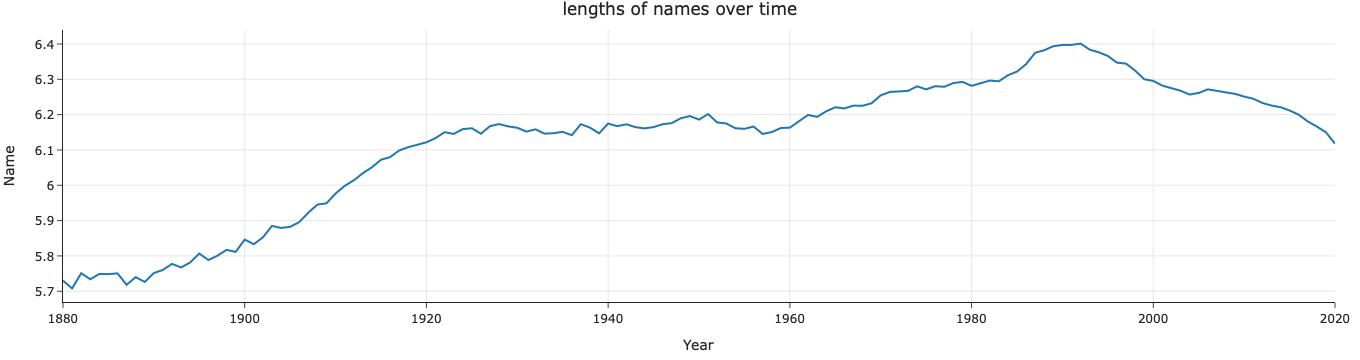

In [275]:
answer=px.line(length_over_time, x='Year', y= 'Name', title = 'lengths of names over time', width=350, height=250)
margin(answer, t=30)

Answer: Names have become longer on average over time until 1992, and then it begins to become shorter on average.

#### Exercise

- In this chapter we found that you could make reasonable guesses at a person's
  age just by knowing their name. For instance, the name "Luna" has sharply
  risen in popularity after 2000, so you could guess that a person named "Luna"
  was born around after 2000. Can you make reasonable guesses at a person's age
  just from the *first letter* of their name? Write code to see whether this is
  possible, and which first letters provide the most information about a
  person's age. 

In [278]:
def first_letter(string):
    return string[0]

In [279]:
baby['Firsts'] = baby['Name'].apply(first_letter)

In [281]:
letter_counts = (baby
 .groupby(['Firsts', 'Year'])
 ['Count']
 .sum()
 .reset_index()
)
letter_counts

,Firsts,Year,Count
0,A,1880,16740
1,A,1881,16257
2,A,1882,18790
...,...,...,...
3638,Z,2018,55996
3639,Z,2019,55293
3640,Z,2020,54011


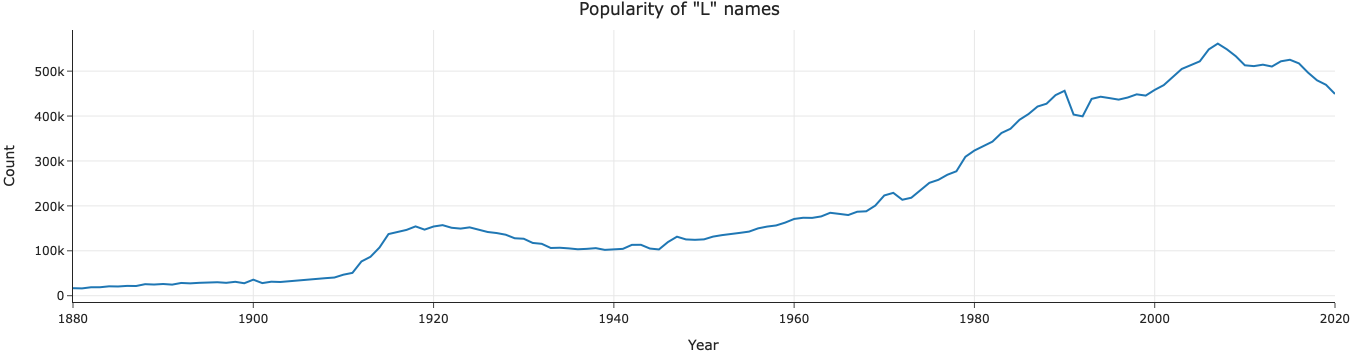

In [283]:
fig = px.line(letter_counts.loc[letter_counts['Firsts'] == 'A'],
              x='Year', y='Count', title='Popularity of "L" names',
              width=350, height=250)
margin(fig, t=30)

It seems possible, for example, I see that people with their names starting with letter 'A' being very popular from the 2000s onwards.